In [ ]:
!pip install yfinance
!pip install pandas_ta
!pip install alpaca-trade-api
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218908 sha256=e1f75655af7425a978f467d0f20986873603c0390ee0fc7a8d5d810479f03549
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.7/323.7 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 16.9 MB/s eta 0:00:00
Reason for being yanked: This version includes overly restrictive multidict upper boundary disallo

In [ ]:
import pandas as pd
import pandas_ta as pta
import numpy as np
import torch
from datetime import date, timedelta
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
from datetime import date, datetime
import os
import matplotlib.pyplot as plt
import yfinance as yf
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [ ]:
#EURUSD=X
#DX-Y.NYB
#GBPUSD=X
interval='1h'
df=yf.Ticker('DX-Y.NYB').history(start='2023-04-23',end='2023-08-24',interval=interval)
df['Stoch1']=pta.stochrsi(df['Close'],length=14,rsi_length=14)['STOCHRSIk_14_14_3_3']
df['Stoch2']=pta.stochrsi(df['Close'],length=14,rsi_length=14)['STOCHRSId_14_14_3_3']
if(interval=='1d'):
  df.reset_index(inplace = True)
  df['Date'] = df['Date'].dt.strftime('%Y%m%d')
  df["Date"]=pd.to_datetime(df["Date"])
  df.set_index(['Date'],inplace=True)

df.drop(['Dividends','Stock Splits','Volume'], axis=1, inplace=True)
df.dropna(inplace=True)

In [ ]:
df

,Open,High,Low,Close,Stoch1,Stoch2
Datetime,,,,,,
2023-04-25 00:00:00-04:00,101.325996,101.337997,101.285004,101.333000,80.762443,56.568292
2023-04-25 01:00:00-04:00,101.333000,101.379997,101.311996,101.342003,92.930512,77.232393
2023-04-25 02:00:00-04:00,101.343002,101.367996,101.277000,101.350998,97.212435,90.301797
2023-04-25 03:00:00-04:00,101.349998,101.504997,101.349998,101.461998,100.000000,96.714316
2023-04-25 04:00:00-04:00,101.461998,101.501999,101.391998,101.398003,92.278682,96.497039
...,...,...,...,...,...,...
2023-08-23 05:00:00-04:00,103.768997,103.900002,103.762001,103.889000,100.000000,69.031571
2023-08-23 06:00:00-04:00,103.889000,103.953003,103.875000,103.926003,100.000000,90.071341
2023-08-23 07:00:00-04:00,103.928001,103.948997,103.823997,103.900002,96.772876,98.924292


In [ ]:
from sklearn.preprocessing import StandardScaler
norm_df = df.copy()
scaler=StandardScaler()
norm_df[norm_df.columns]=scaler.fit_transform(norm_df[norm_df.columns])
norm_df

,Open,High,Low,Close,Stoch1,Stoch2
Datetime,,,,,,
2023-04-25 00:00:00-04:00,-1.003016,-1.040513,-0.993847,-0.997877,0.939797,0.233709
2023-04-25 01:00:00-04:00,-0.996708,-1.002613,-0.969532,-0.989768,1.299569,0.868705
2023-04-25 02:00:00-04:00,-0.987698,-1.013442,-1.001056,-0.981665,1.426172,1.270319
2023-04-25 03:00:00-04:00,-0.981396,-0.889815,-0.935301,-0.881677,1.508592,1.467372
2023-04-25 04:00:00-04:00,-0.880513,-0.892521,-0.897469,-0.939323,1.280296,1.460695
...,...,...,...,...,...,...
2023-08-23 05:00:00-04:00,1.197503,1.271390,1.237361,1.304555,1.508592,0.616698
2023-08-23 06:00:00-04:00,1.305595,1.319218,1.339148,1.337887,1.508592,1.263238
2023-08-23 07:00:00-04:00,1.340725,1.315603,1.293206,1.314465,1.413176,1.535283


In [ ]:
def generate_sequences(df: pd.DataFrame, tw: int, pw: int, target_columns, inplace=False, drop_targets=False):

  data = dict() # Store results into a dictionary
  L = len(df)
  for i in range(L-tw):
    # Option to drop target from dataframe
    if drop_targets:
      df.drop(target_columns, axis=1, inplace=True)

    # Get current sequence
    sequence = df[i:i+tw].values
    # Get values right after the current sequence
    target = df[i+tw:i+tw+pw][target_columns].values
    data[i] = {'sequence': sequence, 'target': target}
  return data

In [ ]:
class SequenceDataset(Dataset):

  def __init__(self, df):
    self.data = df

  def __getitem__(self, idx):
    sample = self.data[idx]
    return torch.Tensor(sample['sequence']), torch.Tensor(sample['target'])

  def __len__(self):
    return len(self.data)

In [ ]:
BATCH_SIZE = 16
nhid = 50
nout = 6
sequence_len = 180
n_dnn_layers = 5
ninp = 6
split = 0.8

sequences = generate_sequences(norm_df, sequence_len, 1,['Open', 'High', 'Low', 'Close','Stoch1',	'Stoch2'])

In [ ]:
sequences[0]

{'sequence': array([[-1.00301617, -1.04051278, -0.99384652, -0.99787733,  0.93979748,
          0.23370926],
        [-0.99670755, -1.00261295, -0.96953219, -0.98976775,  1.29956907,
          0.86870451],
        [-0.98769818, -1.01344246, -1.00105561, -0.98166505,  1.42617207,
          1.27031933],
        ...,
        [-0.75531007, -0.78152722, -0.98123578, -0.92221086,  0.89196186,
          0.80839293],
        [-0.92104534, -0.7995718 , -1.01006524, -0.83753451,  1.19877411,
          1.00785006],
        [-0.83547352, -0.83566785, -0.89476801, -0.91140038,  1.00258433,
          1.07208024]]),
 'target': array([[-0.90933522, -0.95749117, -1.036187  , -1.03841147,  0.85238071,
          1.05836777]])}

In [ ]:
dataset = SequenceDataset(sequences)

In [ ]:
train_len = int(len(dataset)*split)
lens = [train_len, len(dataset)-train_len]
train_ds, test_ds = random_split(dataset, lens)
trainloader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
testloader = DataLoader(test_ds, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)

In [ ]:
x, y = next(iter(trainloader))
y=y.reshape(16,6)
x.shape, y.shape

(torch.Size([16, 180, 6]), torch.Size([16, 6]))

In [ ]:
class LSTMForecaster(nn.Module):


  def __init__(self, n_features, n_hidden, n_outputs, sequence_len, n_lstm_layers=1, n_deep_layers=10, use_cuda=False, dropout=0.2):
    '''
    n_features: number of input features (1 for univariate forecasting)
    n_hidden: number of neurons in each hidden layer
    n_outputs: number of outputs to predict for each training example
    n_deep_layers: number of hidden dense layers after the lstm layer
    sequence_len: number of steps to look back at for prediction
    dropout: float (0 < dropout < 1) dropout ratio between dense layers
    '''
    super().__init__()

    self.n_lstm_layers = n_lstm_layers
    self.nhid = n_hidden
    self.use_cuda = use_cuda 

    # LSTM Layer
    self.lstm = nn.LSTM(n_features,
                        n_hidden,
                        num_layers=n_lstm_layers,
                        batch_first=True) # As we have transformed our data in this way

    # first dense after lstm
    self.fc1 = nn.Linear(n_hidden * sequence_len, n_hidden)
    # Dropout layer
    self.dropout = nn.Dropout(p=dropout)

    # Create fully connected layers (n_hidden x n_deep_layers)
    dnn_layers = []
    for i in range(n_deep_layers):
      # Last layer (n_hidden x n_outputs)
      if i == n_deep_layers - 1:
        dnn_layers.append(nn.ReLU())
        dnn_layers.append(nn.Linear(nhid, n_outputs))
      # All other layers (n_hidden x n_hidden) with dropout option
      else:
        dnn_layers.append(nn.ReLU())
        dnn_layers.append(nn.Linear(nhid, nhid))
        if dropout:
          dnn_layers.append(nn.Dropout(p=dropout))
    # compile DNN layers
    self.dnn = nn.Sequential(*dnn_layers)

  def forward(self, x):
    # Initialize hidden state
    hidden_state = torch.zeros(self.n_lstm_layers, x.shape[0], self.nhid)
    cell_state = torch.zeros(self.n_lstm_layers, x.shape[0], self.nhid)

    # move hidden state to device
    if self.use_cuda:
      hidden_state = hidden_state.to(device)
      cell_state = cell_state.to(device)

    self.hidden = (hidden_state, cell_state)

    # Forward Pass
    x, h = self.lstm(x, self.hidden) # LSTM
    x = self.dropout(x.contiguous().view(x.shape[0], -1)) # Flatten lstm out
    x = self.fc1(x) # First Dense
    return self.dnn(x) # Pass forward through fully connected DNN.

In [ ]:
def plot_losses(tr, va):
  import matplotlib.pyplot as plt
  fig, ax = plt.subplots()
  ax.plot(tr, label='train')
  ax.plot(va, label='validation')
  plt.show()

In [ ]:
USE_CUDA = torch.cuda.is_available()
device = 'cuda' if USE_CUDA else 'cpu'
lr = 4e-4
n_epochs = 20

model = LSTMForecaster(ninp, nhid, nout, sequence_len, n_deep_layers=n_dnn_layers, use_cuda=USE_CUDA).to(device)
criterion = nn.MSELoss().to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=lr)

0 - train: 0.7275267170535193, valid: 0.3729698901826685
1 - train: 0.4463111231724421, valid: 0.3451471741903912
2 - train: 0.43555643955866497, valid: 0.33820138058879157
3 - train: 0.416769696937667, valid: 0.33947319198738446
4 - train: 0.4010801583528519, valid: 0.30514032258228824
5 - train: 0.35136732988887365, valid: 0.23173095082694833
6 - train: 0.27897928208112716, valid: 0.15309636735103346
7 - train: 0.2352025195128388, valid: 0.11579994654113596
8 - train: 0.19883973060382737, valid: 0.09228816459124739
9 - train: 0.1883747169540988, valid: 0.0914086000147191
10 - train: 0.17456682365801598, valid: 0.07502333057874983
11 - train: 0.15378782856795523, valid: 0.0577521181919358
12 - train: 0.14528781664040352, valid: 0.06360738851468671
13 - train: 0.1389456153743797, valid: 0.06324023076079109
14 - train: 0.13263854529294702, valid: 0.06343698891049082
15 - train: 0.1275119165165557, valid: 0.05766081556000493
16 - train: 0.12408999846213394, valid: 0.05841590023853562
17 

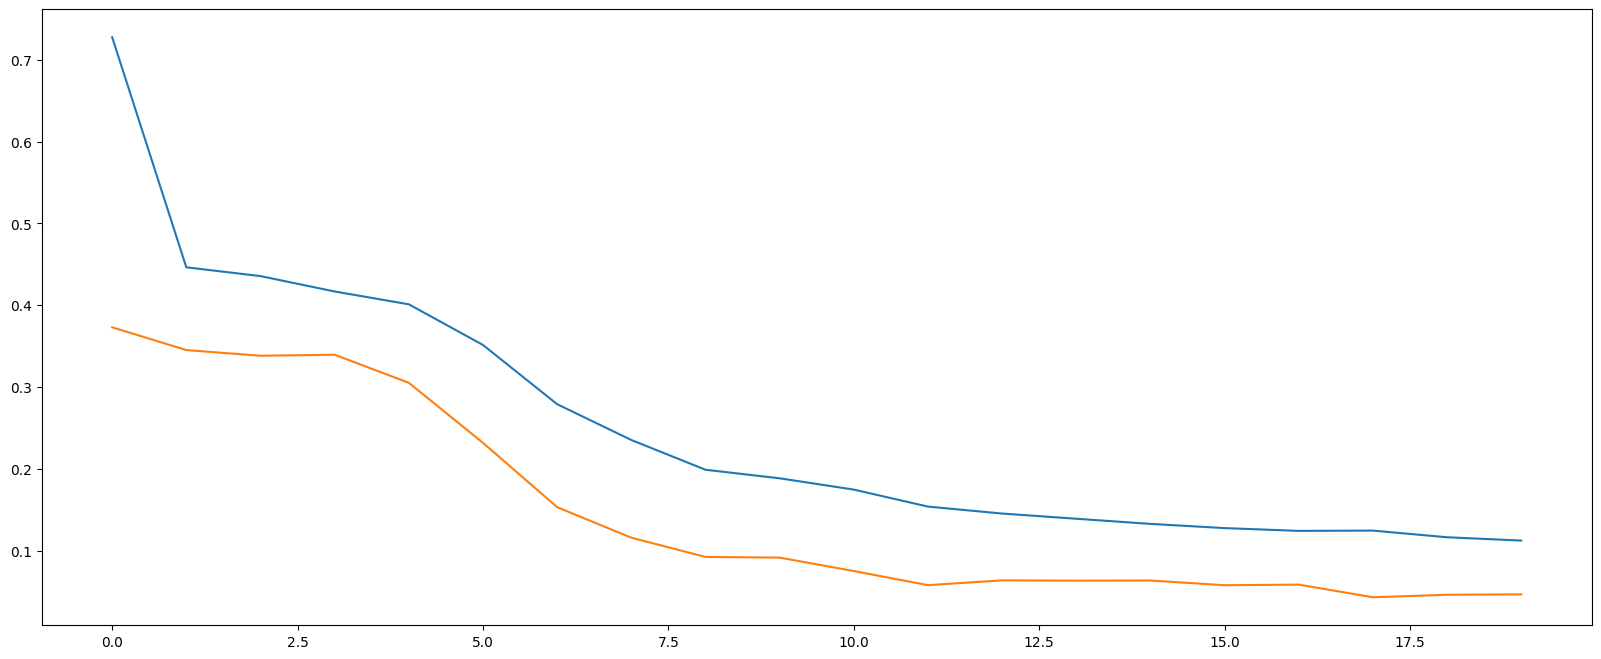

In [ ]:
t_losses, v_losses = [], []
for epoch in range(n_epochs):
  train_loss, valid_loss = 0.0, 0.0

  # train step
  model.train()
  for x, y in trainloader:
    optimizer.zero_grad()
    x = x.to(device)
    y  = y.squeeze().to(device)
    # Forward Pass
    preds = model(x).squeeze()
    loss = criterion(preds, y)
    train_loss += loss.item()
    loss.backward()
    optimizer.step()
  epoch_loss = train_loss / len(trainloader)
  t_losses.append(epoch_loss)

  # validation step
  model.eval()
  for x, y in testloader:
    with torch.no_grad():
      x, y = x.to(device), y.squeeze().to(device)
      preds = model(x).squeeze()
      error = criterion(preds, y)
    valid_loss += error.item()
  valid_loss = valid_loss / len(testloader)
  v_losses.append(valid_loss)

  print(f'{epoch} - train: {epoch_loss}, valid: {valid_loss}')
plot_losses(t_losses, v_losses)

In [ ]:
def make_predictions_from_dataloader(model, dataloader):
  model.eval()
  predictions, actuals = [], []
  for x, y in unshuffled_dataloader:
    with torch.no_grad():
      p = model(x)
      predictions.append(p)
      actuals.append(y.squeeze())
  predictions = torch.cat(predictions).numpy()
  actuals = torch.cat(actuals).numpy()
  return predictions.squeeze(), actuals

In [ ]:
unshuffled_dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=False, drop_last=True)
P, Y = make_predictions_from_dataloader(model, unshuffled_dataloader)
P.shape, Y.shape

((1792, 6), (1792, 6))

In [ ]:
import plotly.graph_objects as go

class Forecaster:

  def __init__(self, model, data, target, tw):
    self.model = model
    self.data = data
    self.tw = tw
    self.target = target

  def plot_forecast(self, history):
    plt.rcParams["figure.figsize"] = (20,8)
    plt.plot(history.index, history.actual)
    plt.plot(history.index, history.forecast)
    #plt.plot(history[-200:].index,norm_df2['Close'])

  def one_step_forecast(self, history):
      '''
      history: a sequence of values representing the latest values of the time
      series, requirement -> len(history.shape) == 2


       pd.DataFrame({'Open':[101.350998],"High":[101.413002],'Low':[101.345001],'Close':[101.407997]})
       df2['Stoch1'][-1:]=pta.stochrsi(df2['Close'],length=14,rsi_length=14)['STOCHRSIk_14_14_3_3'][-1:]
       df2['Stoch2'][-1:]=pta.stochrsi(df2['Close'],length=14,rsi_length=14)['STOCHRSId_14_14_3_3'][-1:]
      outputs a single value which is the prediction of the next value in the
      sequence.
      '''
      self.model.cpu()
      self.model.eval()
      with torch.no_grad():
        pre = torch.Tensor(history).reshape(1,180,6)
        pred = self.model(pre)
      return pred.detach().numpy().reshape(-1)
  def n_step_forecast(self, n: int, forecast_from: int=None, plot=False):
      '''
      n: integer defining how many steps to forecast
      forecast_from: integer defining which index to forecast from. None if
      you want to forecast from the end.
      plot: True if you want to output a plot of the forecast, False if not.
      '''
      history = self.data
      #history2 = self.data

      # Create initial sequence input based on where in the series to forecast
      # from.
      if forecast_from:
        pre = list(history[forecast_from - self.tw : forecast_from][self.target].values)
      else:
        pre = list(history.values)[-self.tw:]

      # Call one_step_forecast n times and append prediction to history
      for i, step in enumerate(range(n)):
        pre_ = np.array(pre[-self.tw:])
        forecast = self.one_step_forecast(pre_).squeeze()

        ###################### CUSTOM #######################

        '''h2=pd.DataFrame({'Open':[forecast[0]],"High":[forecast[1]],'Low':[forecast[2]],'Close':[forecast[3]]})
        history2=history2.append(h2)
        history2.drop(axis=1,columns=['Stoch1','Stoch2'],inplace=True)
        history2['Stoch1']=pta.stochrsi(history2['Close'],length=14,rsi_length=14)['STOCHRSIk_14_14_3_3']
        history2['Stoch2']=pta.stochrsi(history2['Close'],length=14,rsi_length=14)['STOCHRSId_14_14_3_3']
        scaler=StandardScaler()
        history2[['Stoch1','Stoch2']]=scaler.fit_transform(history2[['Stoch1','Stoch2']])
        forecast = np.append(forecast,[history2['Stoch1'][-1:].values,history2['Stoch2'][-1:].values])'''
        ###################### CUSTOM #######################

        pre.append(forecast)

      res = history.copy()
      ls = [np.nan for i in range(len(history))]

      # Note: I have not handled the edge case where the start index + n crosses
      # the end of the dataset
      if forecast_from:
        ls[forecast_from : forecast_from + n] = list(np.array(pre[-n:]))
        res['forecast'] = ls
        res.columns = ['actual', 'forecast']
      else:
        fc = ls + list(np.array(pre[-n:]))
        ls = ls + [np.nan for i in range(len(pre[-n:]))]
        ls[:len(history)] = history.values

        k=[]
        k2=[]

        for i in range(len(ls)):
             if ls[i] is np.nan:
                k.append(ls[i])

             else: k.append(ls[i][3])
        for i in range(len(fc)):
             if fc[i] is np.nan:
                k2.append(fc[i])
             else: k2.append(fc[i][3])
        res = pd.DataFrame([k, k2], index=['actual', 'forecast']).T


      if plot:
        self.plot_forecast(res)
      return res

In [ ]:

#norm_df2=norm_df[-200:].copy()
#norm_df1=norm_df[:-200].copy()

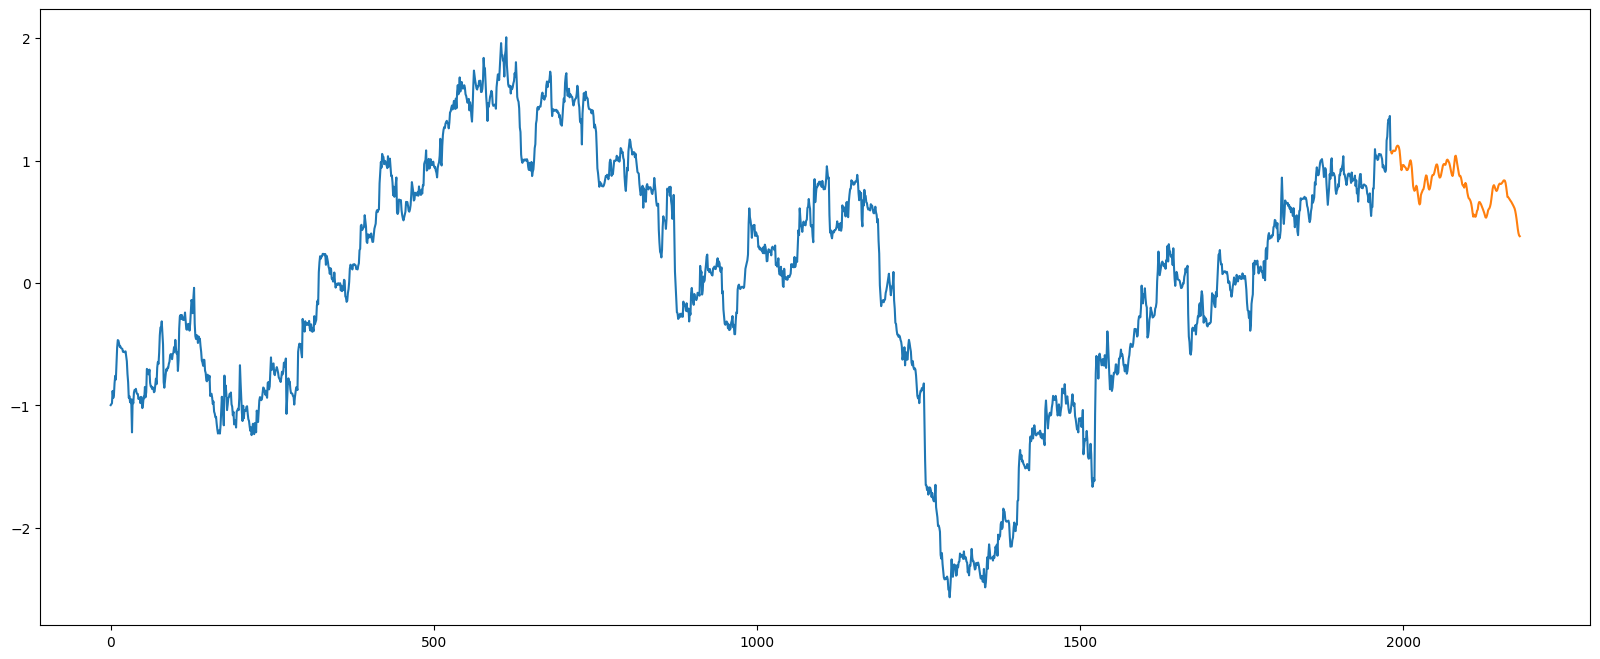

In [ ]:
fc = Forecaster(model, norm_df, 'Close', 180)
history = fc.n_step_forecast(200, plot=True)